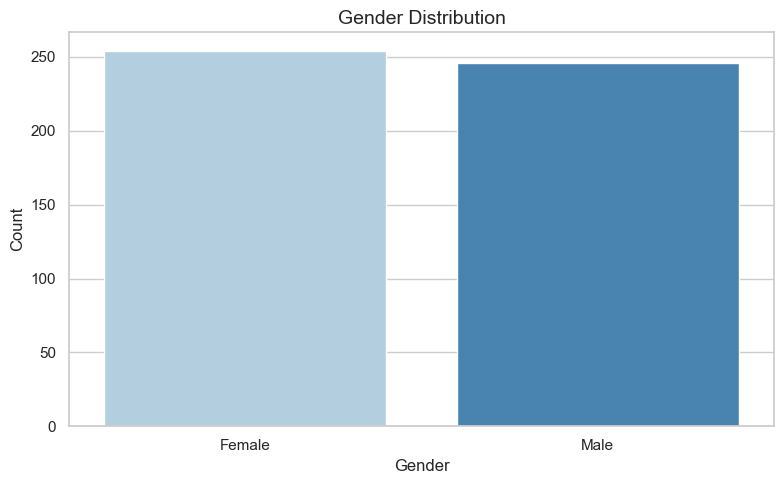

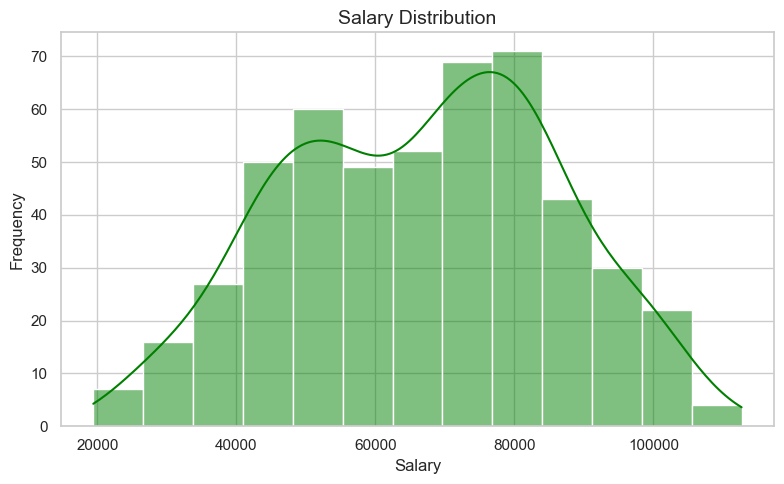


📌 Linear Regression Regression Metrics:
MAE: 3694.83
MSE: 18767567.81
R2 Score: 0.9469
----------------------------------------

📌 Random Forest Regression Metrics:
MAE: 4150.05
MSE: 25808668.41
R2 Score: 0.9269
----------------------------------------


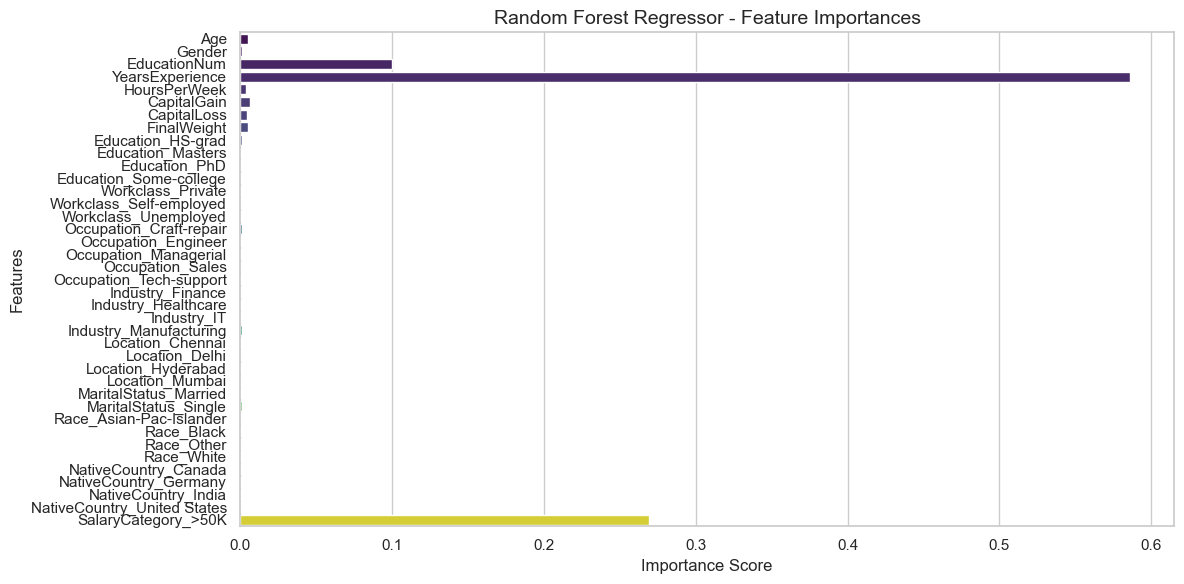

✅ Regression model saved as 'best_regression_model.pkl'

📌 Logistic Regression Classification Metrics:
Accuracy: 0.99
Confusion Matrix:
 [[17  1]
 [ 0 82]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.99      1.00      0.99        82

    accuracy                           0.99       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.99      0.99      0.99       100

----------------------------------------

📌 Random Forest Classifier Classification Metrics:
Accuracy: 1.0
Confusion Matrix:
 [[18  0]
 [ 0 82]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        82

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       10

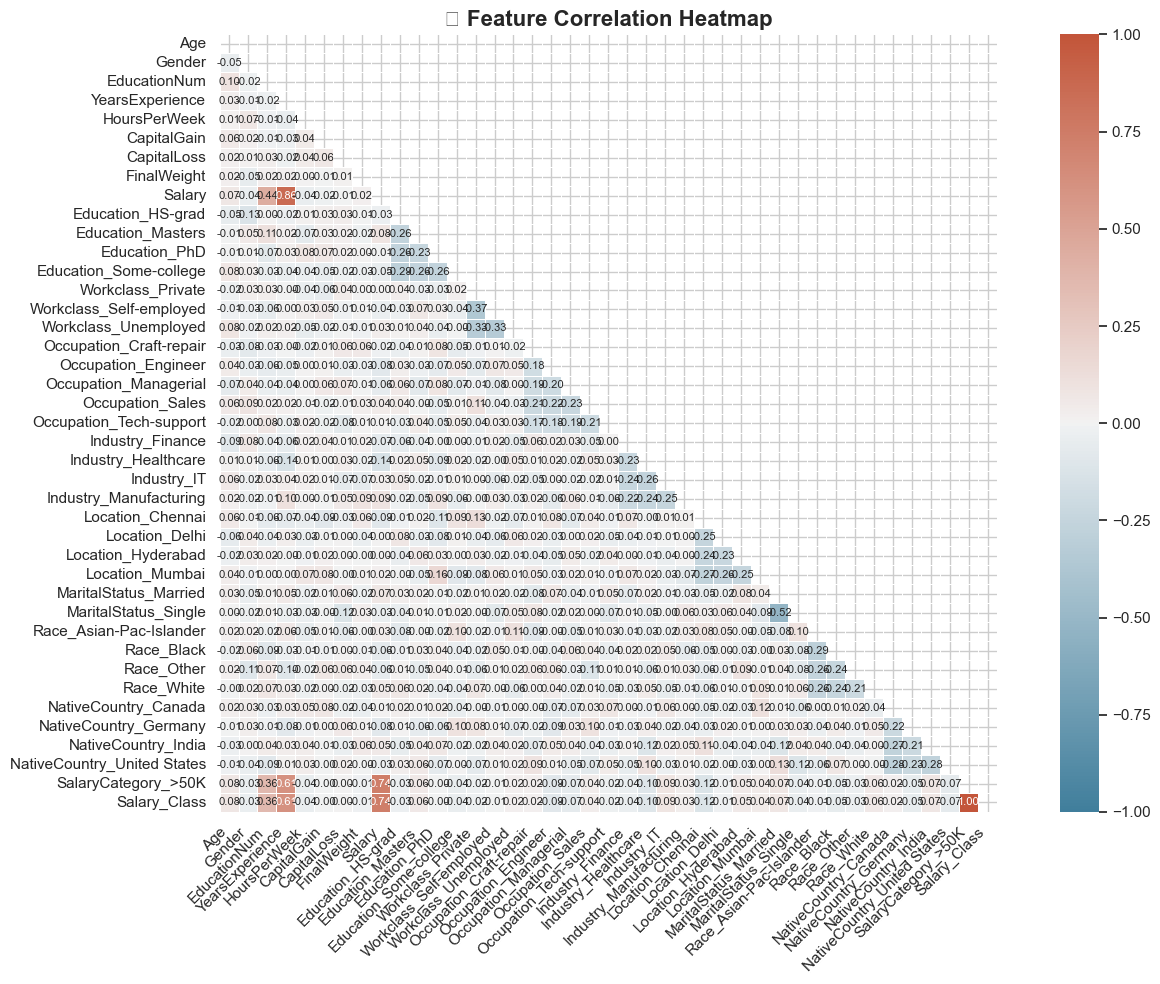

✅ Feature columns saved as 'model_features.pkl'
✅ Encoders saved as 'encoders.pkl'


In [10]:
# salary_model_dev.ipynb

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings
sns.set(style="whitegrid")

# Step 2: Load Dataset
df = pd.read_csv("Employee_Salary_Dataset.csv")

# Step 3: EDA
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', palette="Blues")
plt.title("Gender Distribution", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True, color="green")
plt.title("Salary Distribution", fontsize=14)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Top 10 Highest Earning Professions
if 'Job_Role' in df.columns:
    top_jobs = df.groupby('Job_Role')['Salary'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="mako")
    plt.title("Top 10 Highest Earning Professions", fontsize=14)
    plt.xlabel("Average Salary")
    plt.ylabel("Job Role")
    plt.tight_layout()
    plt.show()

# Step 4: Preprocessing
df.dropna(inplace=True)

# Binary encode Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Rename experience column if needed
if "Experience_Years" in df.columns:
    df.rename(columns={"Experience_Years": "YearsExperience"}, inplace=True)

# Drop ID column if it exists
if "ID" in df.columns:
    df.drop("ID", axis=1, inplace=True)

# One-hot encode all categorical columns (excluding targets)
cat_cols = df.select_dtypes(include='object').columns.tolist()
if "Salary_Class" in cat_cols:
    cat_cols.remove("Salary_Class")
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Save final feature names for later
all_feature_columns = df.drop("Salary", axis=1).columns.tolist()

# Step 5A: REGRESSION SETUP
X_reg = df.drop("Salary", axis=1)
y_reg = df["Salary"]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Step 6A: Regression Models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train_r, y_train_r)
rf.fit(X_train_r, y_train_r)

# Step 7A: Evaluate Regression
def evaluate_reg(name, y_true, y_pred):
    print(f"\n\U0001F4CC {name} Regression Metrics:")
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("MSE:", round(mean_squared_error(y_true, y_pred), 2))
    print("R2 Score:", round(r2_score(y_true, y_pred), 4))
    print("-" * 40)

evaluate_reg("Linear Regression", y_test_r, lr.predict(X_test_r))
evaluate_reg("Random Forest", y_test_r, rf.predict(X_test_r))

# Step 8A: Feature Importance Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=rf.feature_importances_, y=X_reg.columns, palette="viridis")
plt.title("Random Forest Regressor - Feature Importances", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Step 9A: Save Best Regression Model
best_reg_model = rf if r2_score(y_test_r, rf.predict(X_test_r)) > r2_score(y_test_r, lr.predict(X_test_r)) else lr
best_reg_model.feature_names_in_ = np.array(all_feature_columns)
joblib.dump(best_reg_model, "best_regression_model.pkl")
print("\u2705 Regression model saved as 'best_regression_model.pkl'")

# Step 5B: CLASSIFICATION SETUP
df['Salary_Class'] = (df['Salary'] > 50000).astype(int)
X_clf = df.drop(["Salary", "Salary_Class"], axis=1)
y_clf = df["Salary_Class"]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Step 6B: Classification Models
logreg = LogisticRegression(max_iter=1000)
rfc = RandomForestClassifier(random_state=42)

logreg.fit(X_train_c, y_train_c)
rfc.fit(X_train_c, y_train_c)

# Step 7B: Evaluate Classification
def evaluate_clf(name, y_true, y_pred):
    print(f"\n\U0001F4CC {name} Classification Metrics:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 40)

evaluate_clf("Logistic Regression", y_test_c, logreg.predict(X_test_c))
evaluate_clf("Random Forest Classifier", y_test_c, rfc.predict(X_test_c))

# Step 9B: Save Best Classification Model
best_clf_model = rfc if accuracy_score(y_test_c, rfc.predict(X_test_c)) > accuracy_score(y_test_c, logreg.predict(X_test_c)) else logreg
best_clf_model.feature_names_in_ = np.array(X_clf.columns)
joblib.dump(best_clf_model, "best_classification_model.pkl")
print("\u2705 Classification model saved as 'best_classification_model.pkl'")

# Step 10: Correlation Heatmap (Improved)
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8}
)
plt.title("\U0001F517 Feature Correlation Heatmap", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 11: Save Final Model Features for Input Alignment
joblib.dump(all_feature_columns, "model_features.pkl")
print("✅ Feature columns saved as 'model_features.pkl'")

# Step 12: Save Label Encoders for applicable columns
from sklearn.preprocessing import LabelEncoder

# Create encoders only for label-encoded columns
label_columns = ['Gender']
encoders = {}
for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

joblib.dump(encoders, "encoders.pkl")
print("✅ Encoders saved as 'encoders.pkl'")
